In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("/content/Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [30]:
data.rename({'Month':'Date'},axis=1,inplace=True)
data.head()

,Date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


#Data Exploring

In [3]:
data.shape

(96, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [10]:
data.nunique()

Month         96
Passengers    80
dtype: int64

#Feature Engineering

Separating Month and Year into Separate Column for Visualization and
removing meaningful insight of the data.

In [31]:
df=data.copy()
df['Date']=pd.to_datetime(df.Date,format='%b-%y')
# month extraction
df['Month']=df.Date.dt.strftime('%b')
# year extraction
df['Year']=df.Date.dt.strftime('%Y')
df.head()

,Date,Passengers,Month,Year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


In [32]:
df.set_index('Date',inplace=True)
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

##Vizualizing Dataset

<Figure size 1080x720 with 0 Axes>

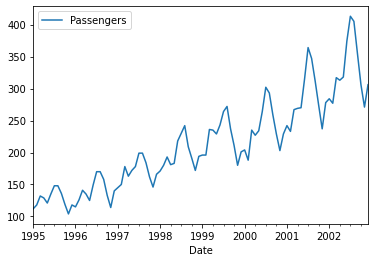

In [33]:
from matplotlib import pyplot
plt.figure(figsize=(15,10))
df.plot()
pyplot.show()

Histogram and Density Plots

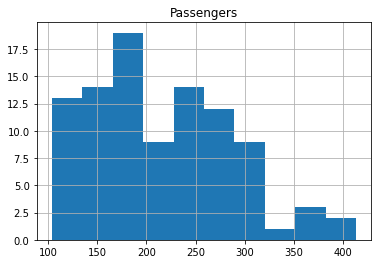

<Figure size 1080x720 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt
df.hist()
plt.figure(figsize=(15,10))
pyplot.show()

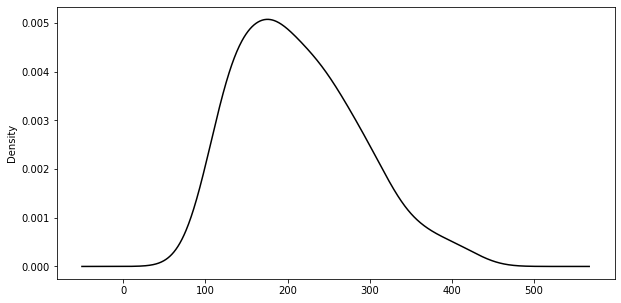

In [35]:
# density plot
ax = plt.axes()
ax.set_facecolor("White")
df['Passengers'].plot(kind='kde',figsize=(10,5),color='Black')

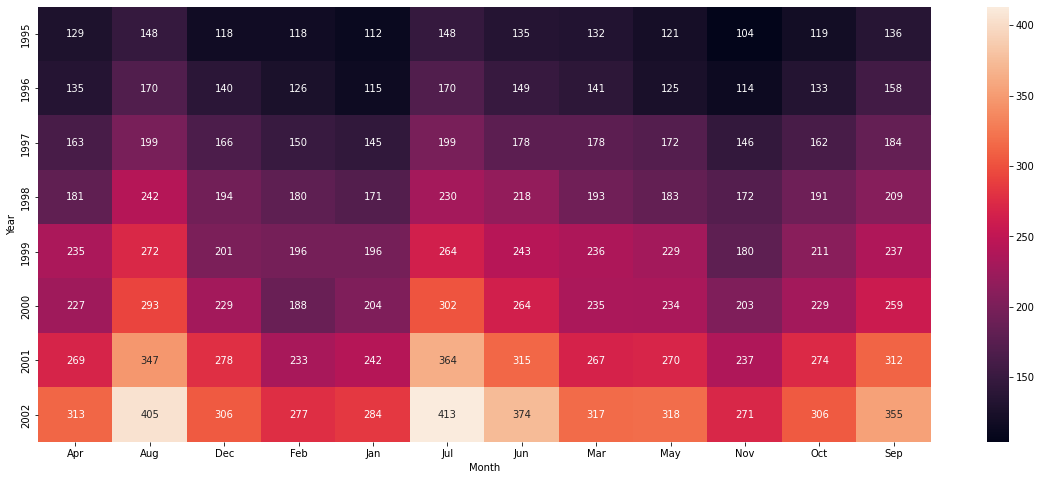

In [38]:
#HeatMap
import seaborn as sns
plt.figure(figsize=(20,8))
heatmap_y_m=pd.pivot_table(data=df,values='Passengers',index='Year',columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_m,annot=True,fmt='g')

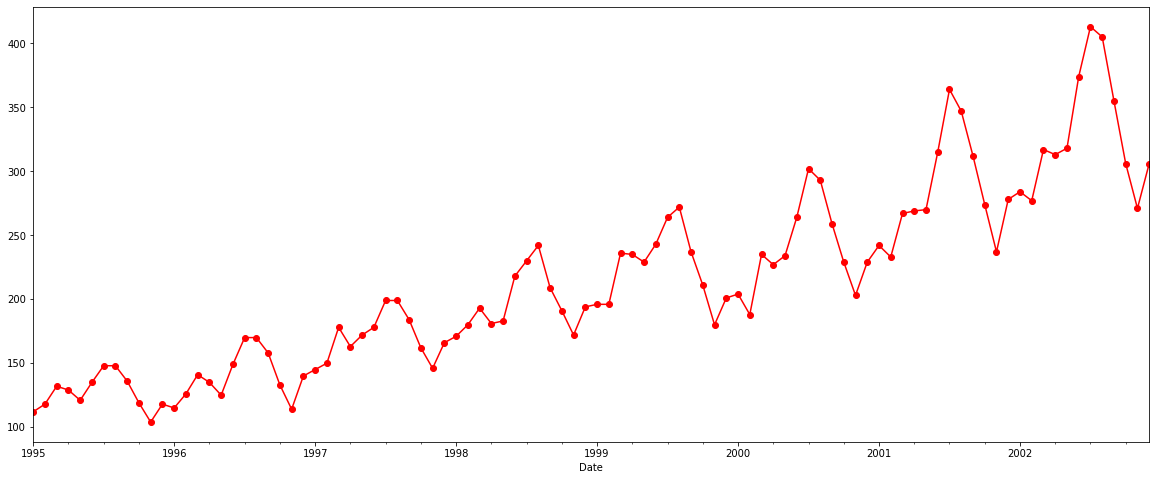

In [39]:
# Line plot
df['Passengers'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

Upward Direction trend

#Yearly Passenger Analysis

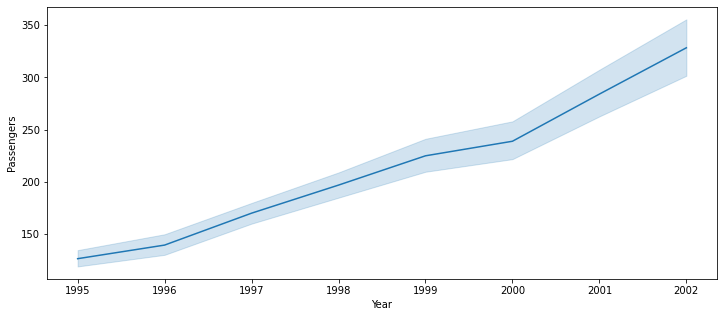

In [41]:
plt.figure(figsize=(12,5))

sns.lineplot(x='Year',y='Passengers',data=df)

#Box plot for each year by monthly intervals

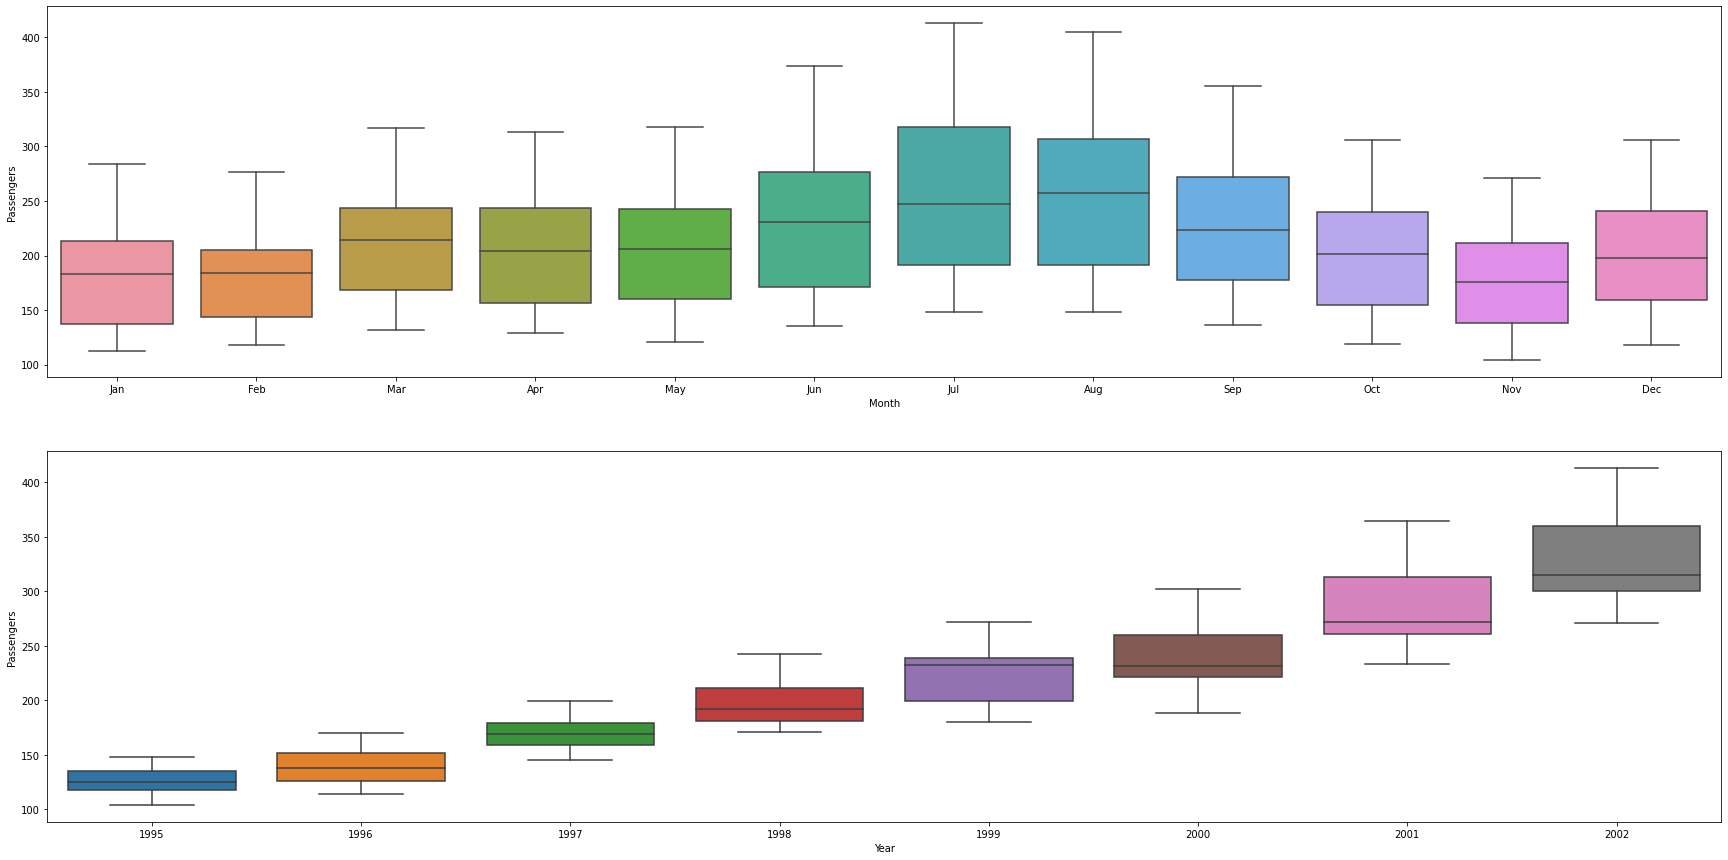

In [44]:
plt.figure(figsize=(30,15))
plt.subplot(211)
sns.boxplot(x="Month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="Year",y="Passengers",data=df)

#Lag plot

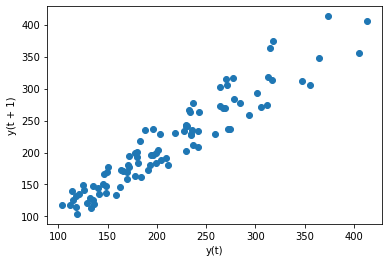

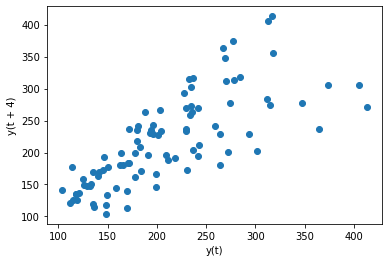

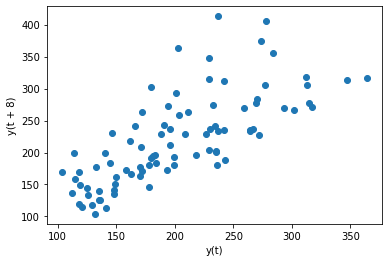

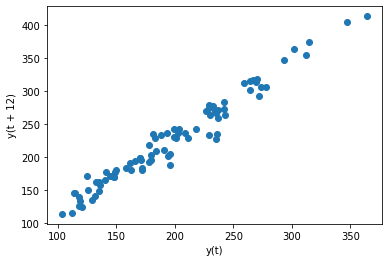

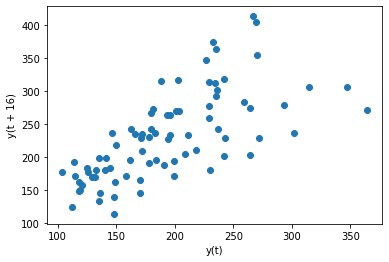

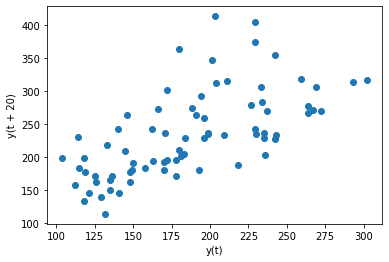

In [46]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1, 4, 8,12, 16, 20]:
    lag_plot(df.Passengers, lag=i)
    plt.show()


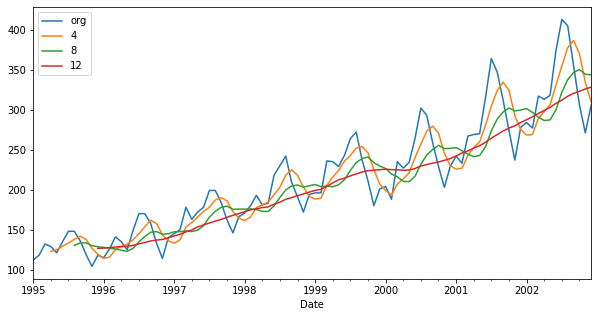

In [52]:
#Moving Avg
plt.figure(figsize=(10,5))
df.Passengers.plot(label="org")
for i in range(4,13,4):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

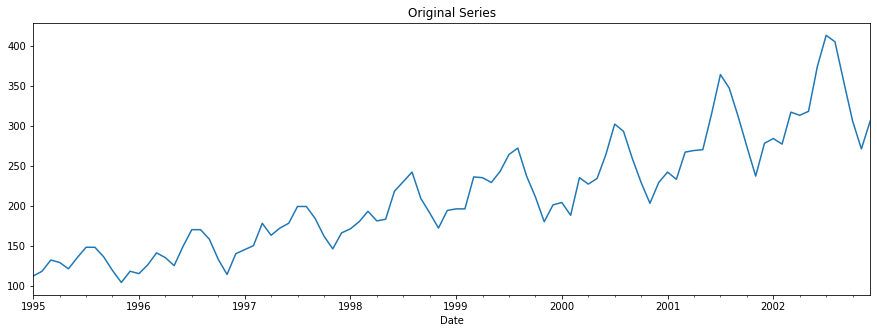

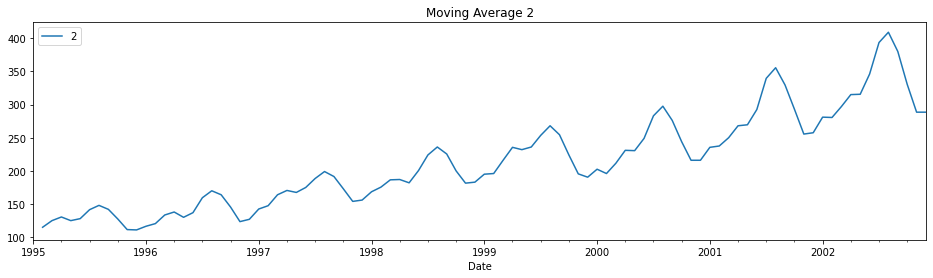

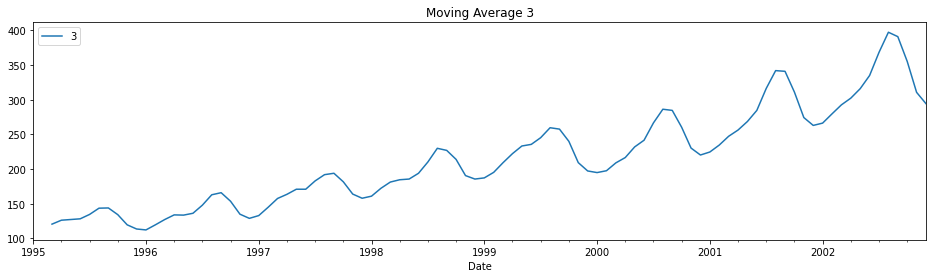

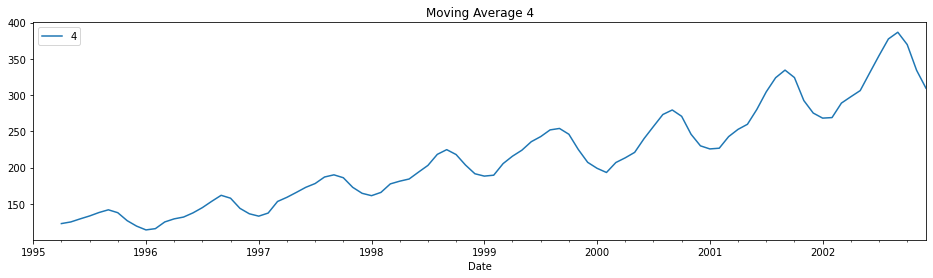

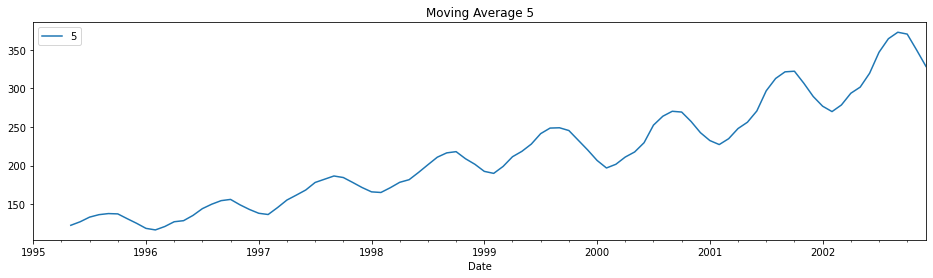

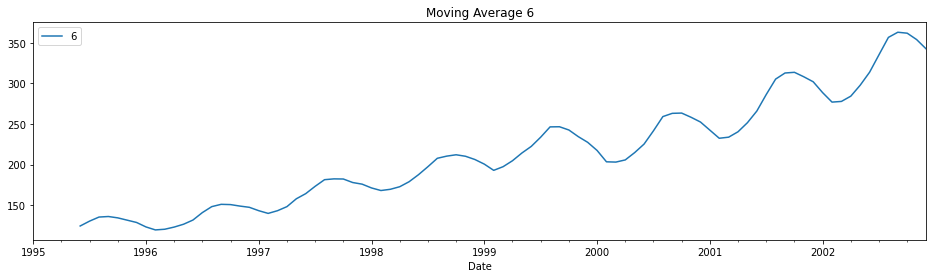

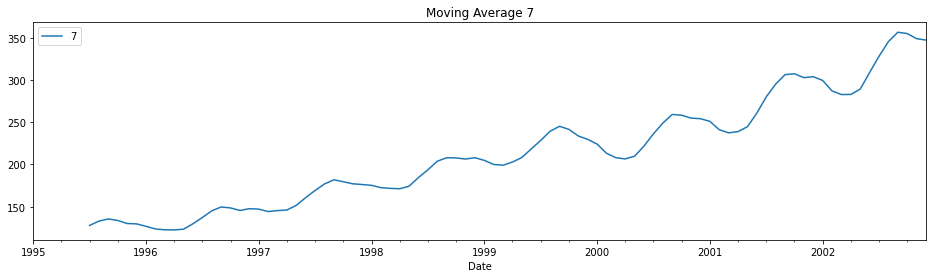

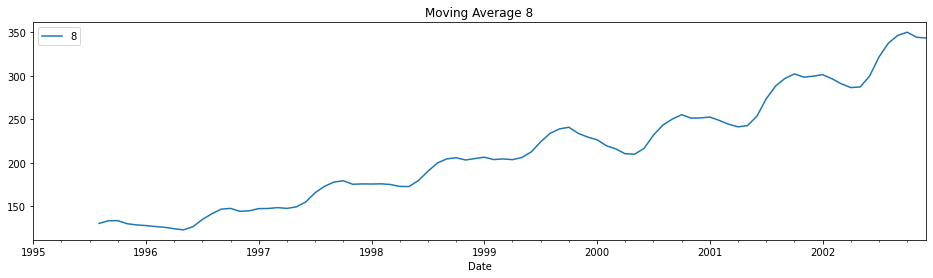

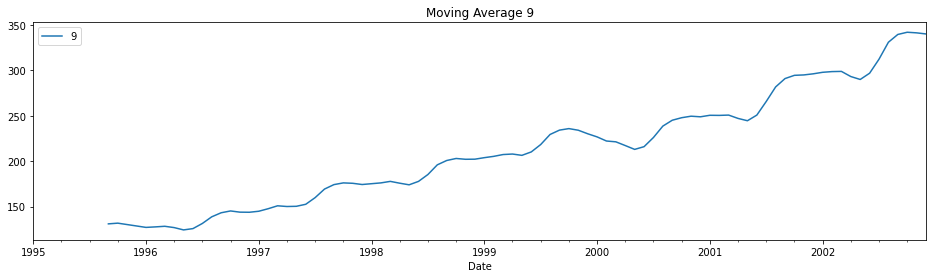

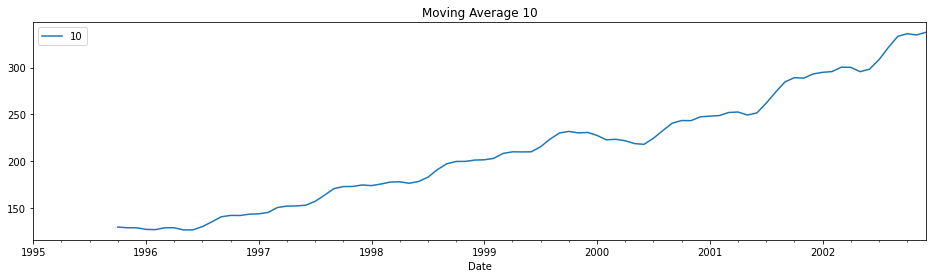

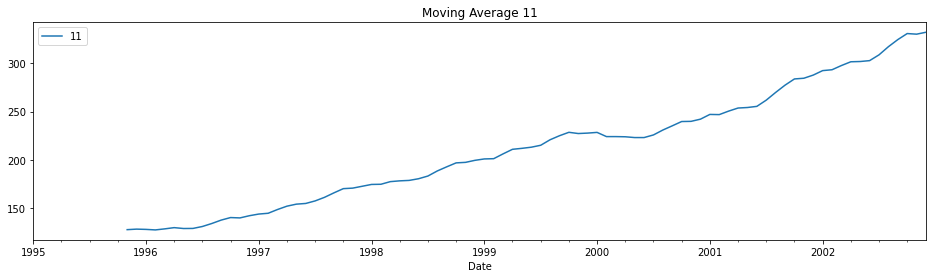

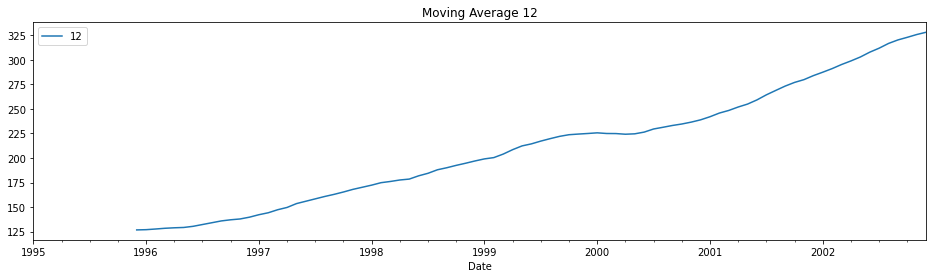

In [53]:
plt.figure(figsize=(15,5))

df.Passengers.plot(label="org")
plt.title("Original Series")

for i in range(2,13):
    plt.figure(figsize=(16,4))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

#Time series decomposition plot

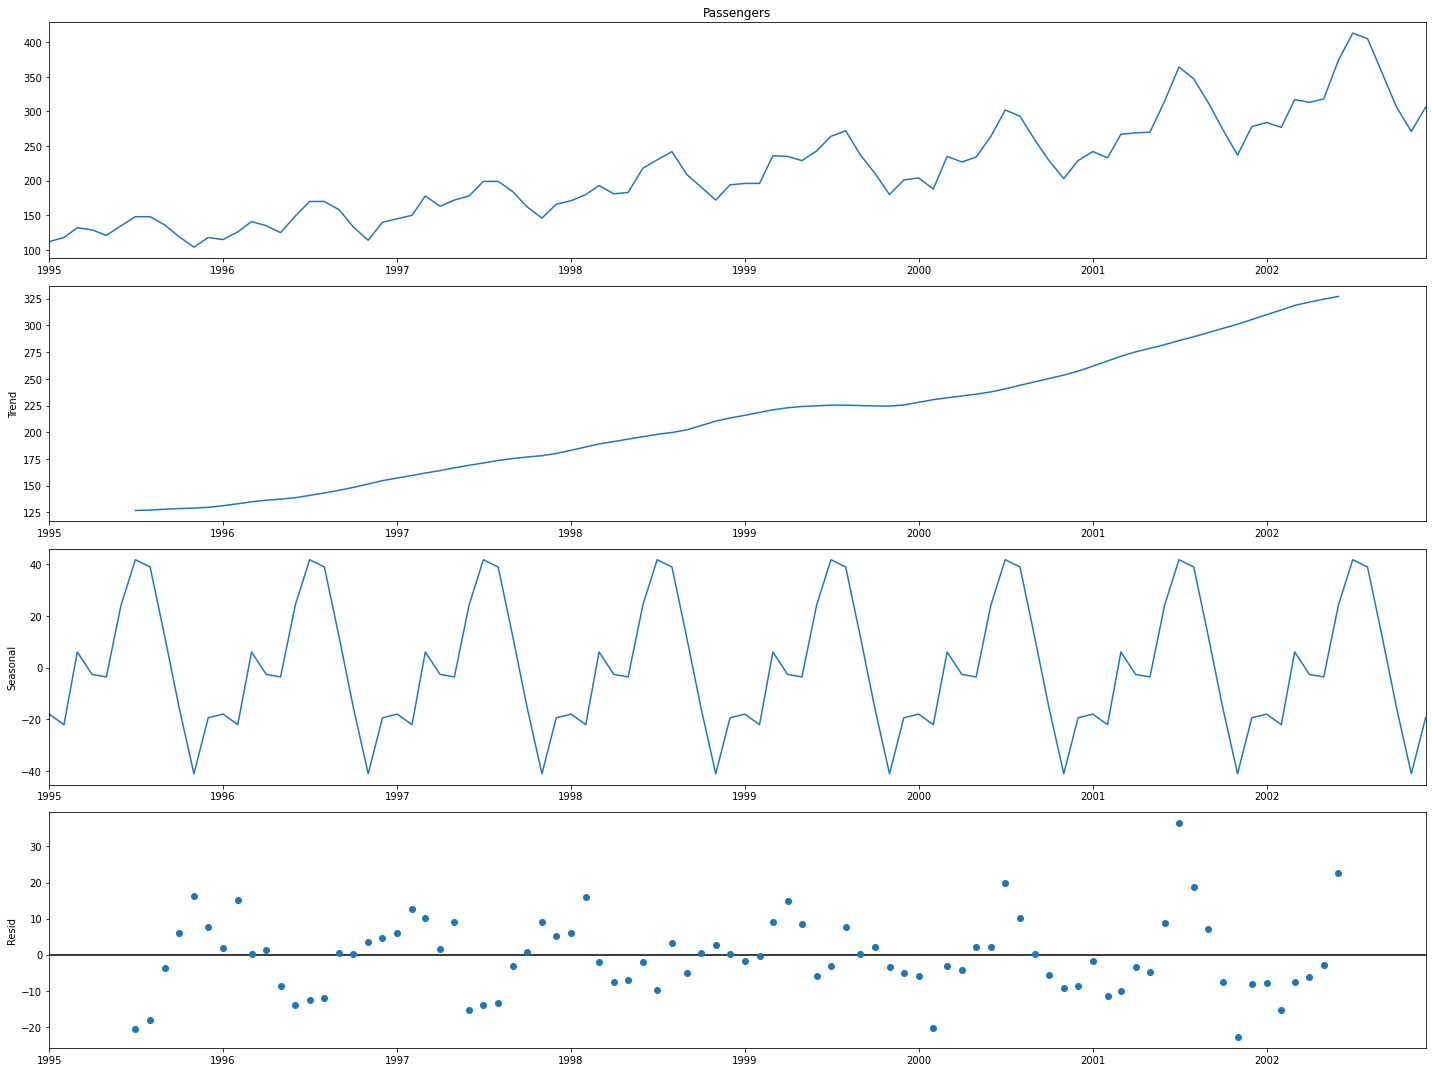

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts = seasonal_decompose(df.Passengers,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(20,15))
    decompose_ts.plot()
    plt.show()

# ACF plots and PACF plots
# Autocorrelation Function (ACF)

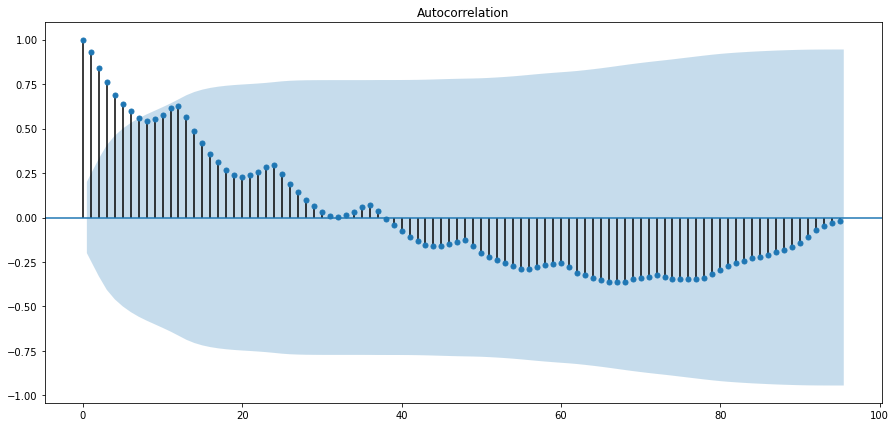

In [55]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(15,7))
    tsa_plots.plot_acf(df.Passengers,lags=95)
    plt.show()

#Partial Autocorrelation Function (PACF)                                   
PACF is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables.

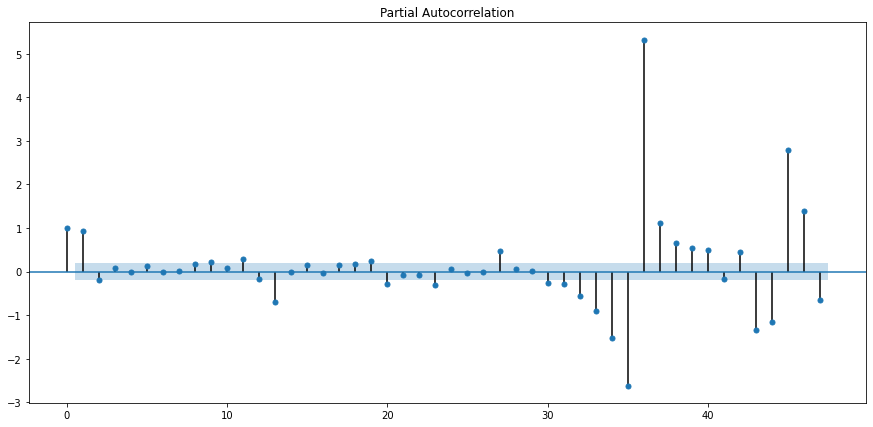

In [56]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(15,7))
    tsa_plots.plot_pacf(df.Passengers,lags=47)
    plt.show()

In [57]:
df.head()

,Passengers,Month,Year
Date,,,
1995-01-01,112,Jan,1995
1995-02-01,118,Feb,1995
1995-03-01,132,Mar,1995
1995-04-01,129,Apr,1995
1995-05-01,121,May,1995


In [61]:
df1=data.copy()
df1['Date']=pd.to_datetime(df1.Date,format='%b-%y')
df1['Year']=df1.Date.dt.strftime('%Y')
df1['Month']=df1.Date.dt.strftime('%b')
df1['week'] = df1['Date'].dt.isocalendar().week
df1['quarter'] = df1['Date'].dt.quarter
df1['day_of_week'] = df1['Date'].dt.day_name()

df1.set_index('Date',inplace=True)
df1.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Date')

In [62]:
df1.head()

,Passengers,Year,Month,week,quarter,day_of_week
Date,,,,,,
1995-01-01,112,1995,Jan,52,1,Sunday
1995-02-01,118,1995,Feb,5,1,Wednesday
1995-03-01,132,1995,Mar,9,1,Wednesday
1995-04-01,129,1995,Apr,13,2,Saturday
1995-05-01,121,1995,May,18,2,Monday


In [64]:
df1.Year.unique()

array(['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002'],
      dtype=object)

# Time Series Decomposition

## Additive Seasonal Decomposition

In [65]:
df1

,Passengers,Year,Month,week,quarter,day_of_week
Date,,,,,,
1995-01-01,112,1995,Jan,52,1,Sunday
1995-02-01,118,1995,Feb,5,1,Wednesday
1995-03-01,132,1995,Mar,9,1,Wednesday
1995-04-01,129,1995,Apr,13,2,Saturday
1995-05-01,121,1995,May,18,2,Monday
...,...,...,...,...,...,...
2002-08-01,405,2002,Aug,31,3,Thursday
2002-09-01,355,2002,Sep,35,3,Sunday
2002-10-01,306,2002,Oct,40,4,Tuesday


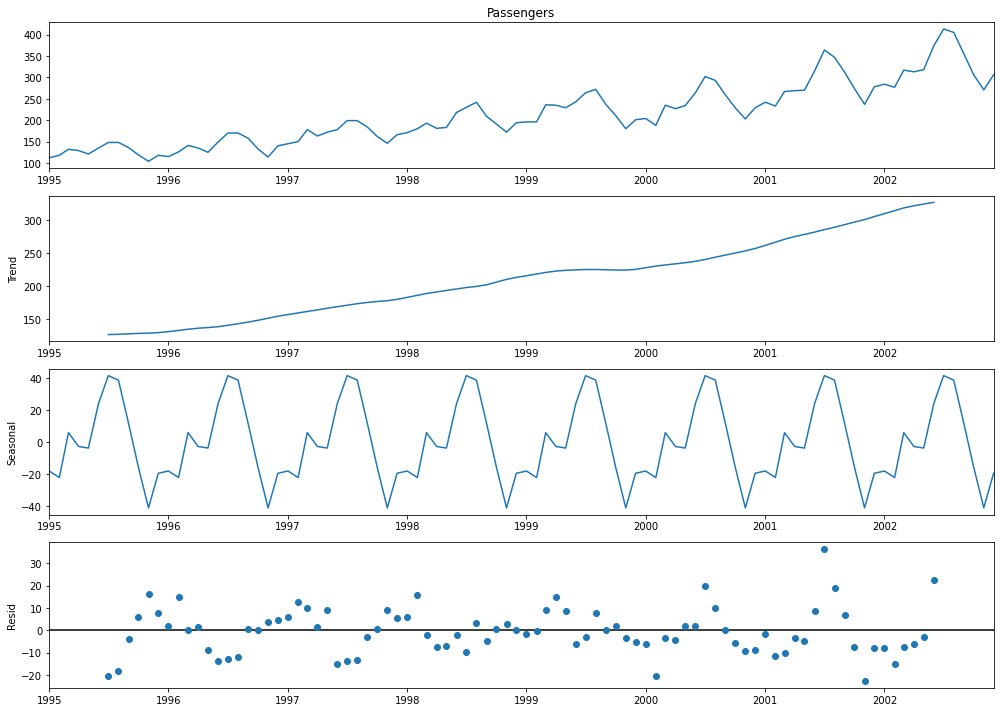

In [67]:
decompose_ts_add = seasonal_decompose(df1.Passengers,period=12, model='additive')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

#Multiplicative Seasonal Decomposition

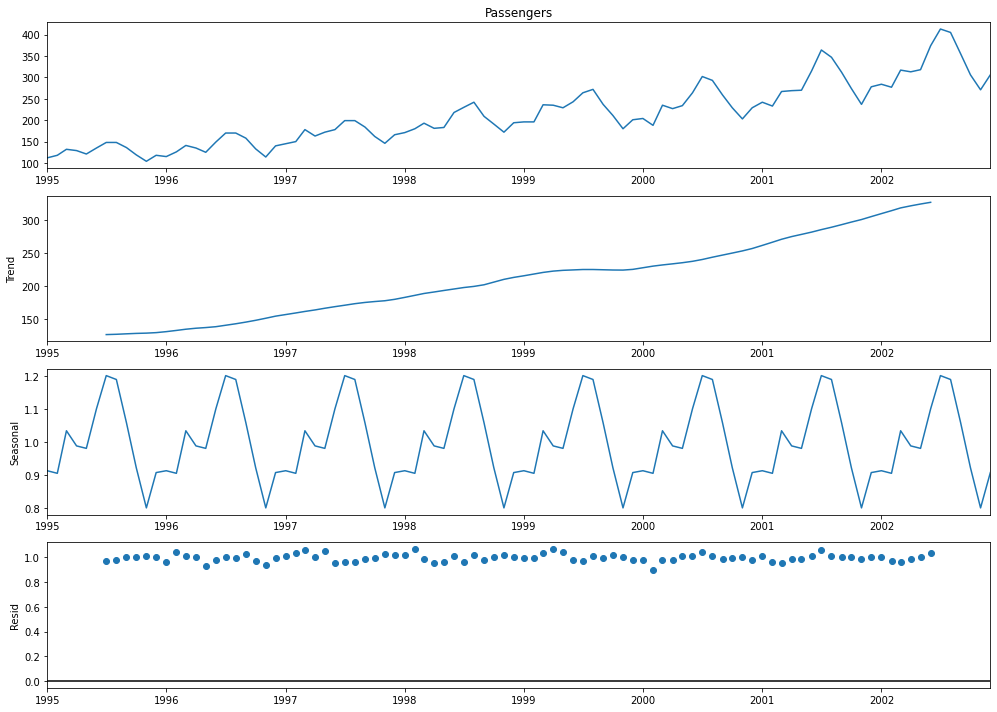

In [68]:
decompose_mul = seasonal_decompose(df1.Passengers,period=12, model='multiplicative')
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_mul.plot()
    plt.show()

#Splitting Train and Test Data

Leaving Test Data with 2 Years of Time Series

In [69]:
size = 72
train_df = df1[:size]
test_df = df1[size:]
print('Train:',train_df.index.min(),train_df.index.max())
print('Test:',test_df.index.min(),test_df.index.max())

Train: 1995-01-01 00:00:00 2000-12-01 00:00:00
Test: 2001-01-01 00:00:00 2002-12-01 00:00:00


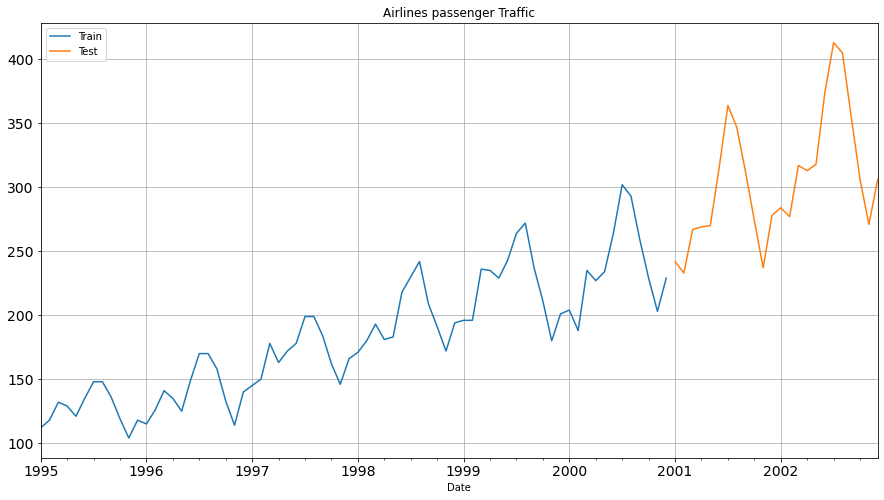

In [70]:
train_df.Passengers.plot(figsize=(15,8), title= 'Airlines passenger Traffic', fontsize=14, label='Train')
test_df.Passengers.plot(figsize=(15,8), title= 'Airlines passenger Traffic', fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

Evaluation Metric MAPE

In [71]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#Exponential Methods

Simple Exponential Method

In [79]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt,HoltWintersResults
from numpy import sqrt 
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [80]:
ses_model = SimpleExpSmoothing(train_df['Passengers']).fit(optimized=True)
test_pred_ses = ses_model.forecast(24)
train_pred_ses = ses_model.fittedvalues
test_rmse_ses = sqrt(mean_squared_error(test_pred_ses,test_df.Passengers))
train_rmse_ses = sqrt(mean_squared_error(train_pred_ses,train_df.Passengers))
mape_ses = MAPE(test_pred_ses,test_df.Passengers)

print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ses),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ses),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ses))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 23.382283350045057 
 Train Root Mean Squared Error = 19.03177173091111 
 Test Root Mean Squared Error = 91.11325402904487


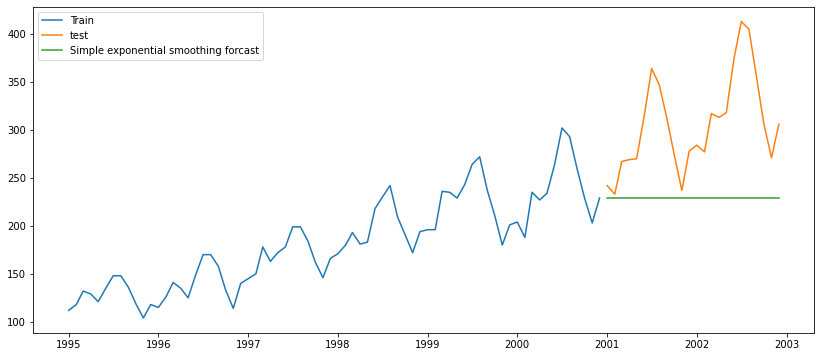

In [81]:
plt.figure(figsize=(14,6))
plt.plot(train_df.Passengers, label='Train')
plt.plot(test_df.Passengers, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.legend(loc='best')
plt.show()


No seasonality captures.

#Holt method (Double Exponential)

It Captures both Level and Trend.

In [82]:
dexp_model  = Holt(train_df['Passengers']).fit(optimized=True)
test_pred_dexp = dexp_model.forecast(24)
train_pred_dexp = dexp_model.fittedvalues
test_rmse_dexp = sqrt(mean_squared_error(test_pred_dexp,test_df.Passengers))
train_rmse_dexp = sqrt(mean_squared_error(train_pred_dexp,train_df.Passengers))
mape_dexp = MAPE(test_pred_dexp,test_df.Passengers)
print('Simple Exponential Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_dexp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_dexp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_dexp))

Simple Exponential Method Evaluation 
 Mean Absolute Percent Error = 17.12220875270047 
 Train Root Mean Squared Error = 18.9612923452262 
 Test Root Mean Squared Error = 71.55255166207006


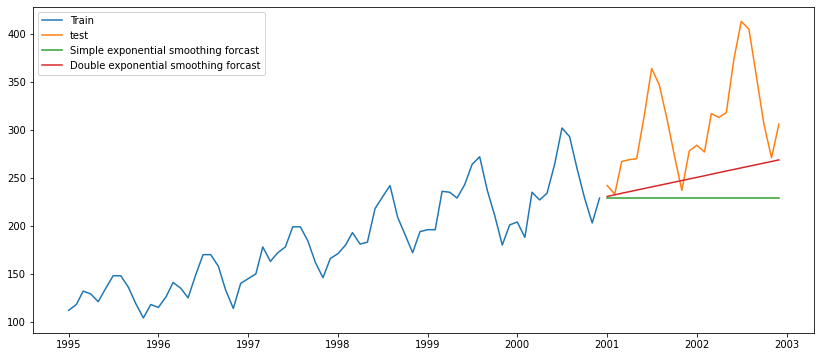

In [83]:
plt.figure(figsize=(14,6))
plt.plot(train_df.Passengers, label='Train')
plt.plot(test_df.Passengers, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.legend(loc='best')
plt.show()

We can see that it capture the trend of the data.
We were not able to capture the seasonality

#Holts winter exponential smoothing with additive seasonality and trend (Triple Exponential)


**It Captures Level, Trend and Seasonality.**

In [84]:
texp_add_model  = ExponentialSmoothing(train_df.Passengers,seasonal="add",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_ad = texp_add_model.forecast(24)
train_pred_ad = texp_add_model.fittedvalues
test_rmse_ad = sqrt(mean_squared_error(test_pred_ad,test_df.Passengers))
train_rmse_ad = sqrt(mean_squared_error(train_pred_ad,train_df.Passengers))
mape_ad = MAPE(test_pred_ad,test_df.Passengers)
print('Triple Exponential with Additive Trend and Seosonality Method Evaluation',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad))

Triple Exponential with Additive Trend and Seosonality Method Evaluation 
 Mean Absolute Percent Error = 11.827733506174823 
 Train Root Mean Squared Error = 7.87611550697006 
 Test Root Mean Squared Error = 46.828518857795196


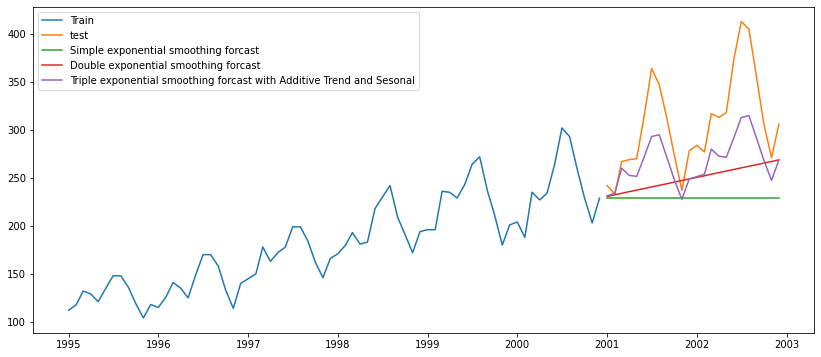

In [85]:
plt.figure(figsize=(14,6))
plt.plot(train_df.Passengers, label='Train')
plt.plot(test_df.Passengers, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.legend(loc='best')
plt.show()

#Holts winter exponential smoothing with multiplicative seasonality and additive trend (Triple Exponential).

In [86]:
texp_mul_ad_model  = ExponentialSmoothing(train_df.Passengers,seasonal="mul",trend="add",seasonal_periods=12).fit(optimized=True)
test_pred_mul_ad_texp = texp_mul_ad_model.forecast(24)
train_pred_mul_ad_texp = texp_mul_ad_model.fittedvalues
test_rmse_mul_ad_texp = sqrt(mean_squared_error(test_pred_mul_ad_texp,test_df.Passengers))
train_rmse_mul_ad_texp = sqrt(mean_squared_error(train_pred_mul_ad_texp,train_df.Passengers))
mape_mul_ad_texp = MAPE(test_pred_mul_ad_texp,test_df.Passengers)
print('Triple Exponential Method with Multiplicative Seasonality and Additive Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_ad_texp),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_ad_texp),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_ad_texp))

Triple Exponential Method with Multiplicative Seasonality and Additive Trend 
 Mean Absolute Percent Error = 9.368263038410854 
 Train Root Mean Squared Error = 6.386634442037317 
 Test Root Mean Squared Error = 34.98903880364754


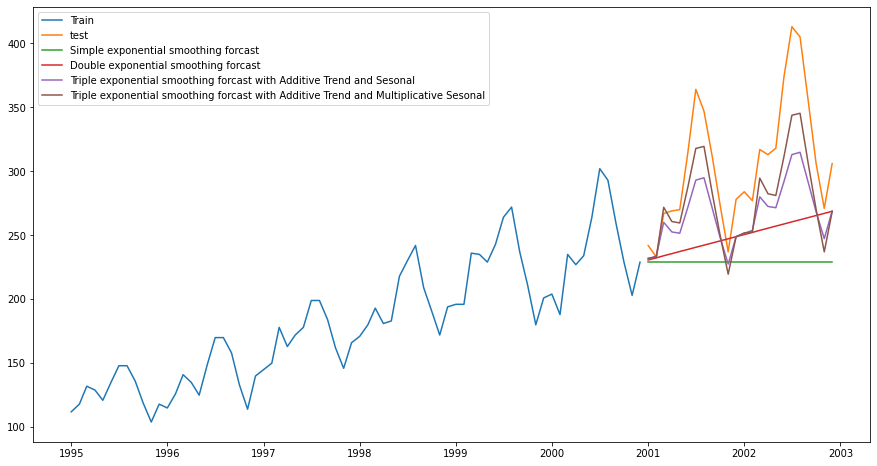

In [87]:
plt.figure(figsize=(15,8))
plt.plot(train_df.Passengers, label='Train')
plt.plot(test_df.Passengers, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.legend(loc='best')
plt.show()

#Holts winter exponential smoothing with Additive seasonality and multiplicative trend (Triple Exponential)




In [88]:
texp_ad_mul_model  = ExponentialSmoothing(train_df.Passengers,seasonal="add",trend="mul",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5)
test_pred_ad_mul_texp  = texp_ad_mul_model.forecast(24)
train_pred_ad_mul_texp  = texp_ad_mul_model.fittedvalues
test_rmse_ad_mul_texp  = sqrt(mean_squared_error(test_pred_ad_mul_texp ,test_df.Passengers))
train_rmse_ad_mul_texp  = sqrt(mean_squared_error(train_pred_ad_mul_texp ,train_df.Passengers))
mape_ad_mul_texp  = MAPE(test_pred_ad_mul_texp,test_df.Passengers)
print('Triple Exponential Method with Additive Seasonality and Multiplicative Trend',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_ad_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_ad_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_ad_mul_texp ))

Triple Exponential Method with Additive Seasonality and Multiplicative Trend 
 Mean Absolute Percent Error = 12.61847809187586 
 Train Root Mean Squared Error = 12.74442252797055 
 Test Root Mean Squared Error = 45.49259086488603


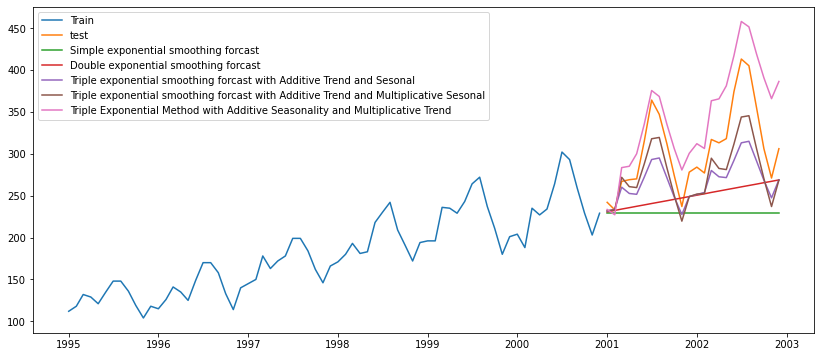

In [89]:
plt.figure(figsize=(14,6))
plt.plot(train_df.Passengers, label='Train')
plt.plot(test_df.Passengers, label='test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.legend(loc='best')
plt.show()

#Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend (Triple Exponential)

In [90]:
texp_mul_model  = ExponentialSmoothing(train_df.Passengers,seasonal="mul",trend="mul",seasonal_periods=12).fit(optimized=True)
test_pred_mul_texp  = texp_mul_model.forecast(24)
train_pred_mul_texp  = texp_mul_model.fittedvalues
test_rmse_mul_texp  = sqrt(mean_squared_error(test_pred_mul_texp ,test_df.Passengers))
train_rmse_mul_texp  = sqrt(mean_squared_error(train_pred_mul_texp ,train_df.Passengers))
mape_mul_texp  = MAPE(test_pred_mul_texp,test_df.Passengers)
print('Triple Exponential Method with multiplicative Trend and Seasonality',"\n",\
      'Mean Absolute Percent Error = {}'.format(mape_mul_texp ),"\n",\
'Train Root Mean Squared Error = {}'.format(train_rmse_mul_texp ),"\n",
'Test Root Mean Squared Error = {}'.format(test_rmse_mul_texp ))

Triple Exponential Method with multiplicative Trend and Seasonality 
 Mean Absolute Percent Error = 6.03511235766673 
 Train Root Mean Squared Error = 6.396756219048916 
 Test Root Mean Squared Error = 23.058960428274997


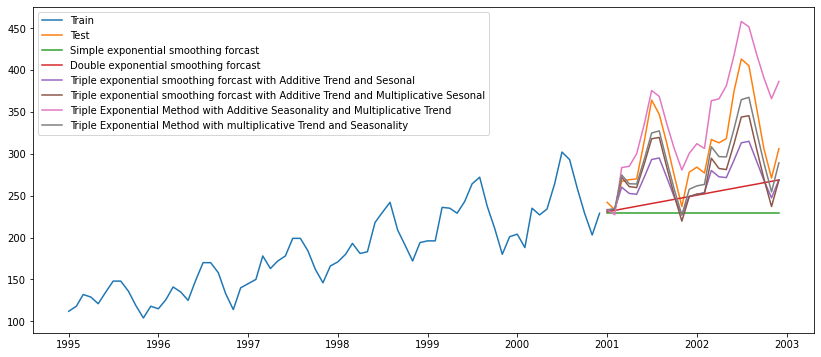

In [91]:
plt.figure(figsize=(14,6))
plt.plot(train_df.Passengers, label='Train')
plt.plot(test_df.Passengers, label='Test')
plt.plot(test_pred_ses, label='Simple exponential smoothing forcast')
plt.plot(test_pred_dexp, label='Double exponential smoothing forcast')
plt.plot(test_pred_ad, label='Triple exponential smoothing forcast with Additive Trend and Sesonal')
plt.plot(test_pred_mul_ad_texp, label='Triple exponential smoothing forcast with Additive Trend and Multiplicative Sesonal')
plt.plot(test_pred_ad_mul_texp, label='Triple Exponential Method with Additive Seasonality and Multiplicative Trend')
plt.plot(test_pred_mul_texp, label='Triple Exponential Method with multiplicative Trend and Seasonality')
plt.legend(loc='best')
plt.show()

In [92]:
#Comparing the results 

Evaluation = {"Models":pd.Series(["Simple_Exp","Double_Exp","Triple_Exp_ad","Triple_Exp_mul_ad","Triple_Exp_ad_mul"\
                                  ,"Triple_Exp_mul"]),\
        "Train_RMSE":pd.Series([train_rmse_ses,train_rmse_dexp,train_rmse_ad,train_rmse_mul_ad_texp,train_rmse_ad_mul_texp,train_rmse_mul_texp]),\
        "Test_MAPE(%)":pd.Series([mape_ses,mape_dexp,mape_ad,mape_mul_ad_texp,mape_ad_mul_texp,mape_mul_texp]),\
        "Test_RMSE_Values":pd.Series([test_rmse_ses,test_rmse_dexp,test_rmse_ad,test_rmse_mul_ad_texp,test_rmse_ad_mul_texp,test_rmse_mul_texp])}
table_evaluation=pd.DataFrame(Evaluation)
table_evaluation.sort_values(['Test_MAPE(%)'], inplace=True, ignore_index=True)
table_evaluation

,Models,Train_RMSE,Test_MAPE(%),Test_RMSE_Values
0,Triple_Exp_mul,6.396756,6.035112,23.058960
1,Triple_Exp_mul_ad,6.386634,9.368263,34.989039
2,Triple_Exp_ad,7.876116,11.827734,46.828519
3,Triple_Exp_ad_mul,12.744423,12.618478,45.492591
4,Double_Exp,18.961292,17.122209,71.552552
5,Simple_Exp,19.031772,23.382283,91.113254


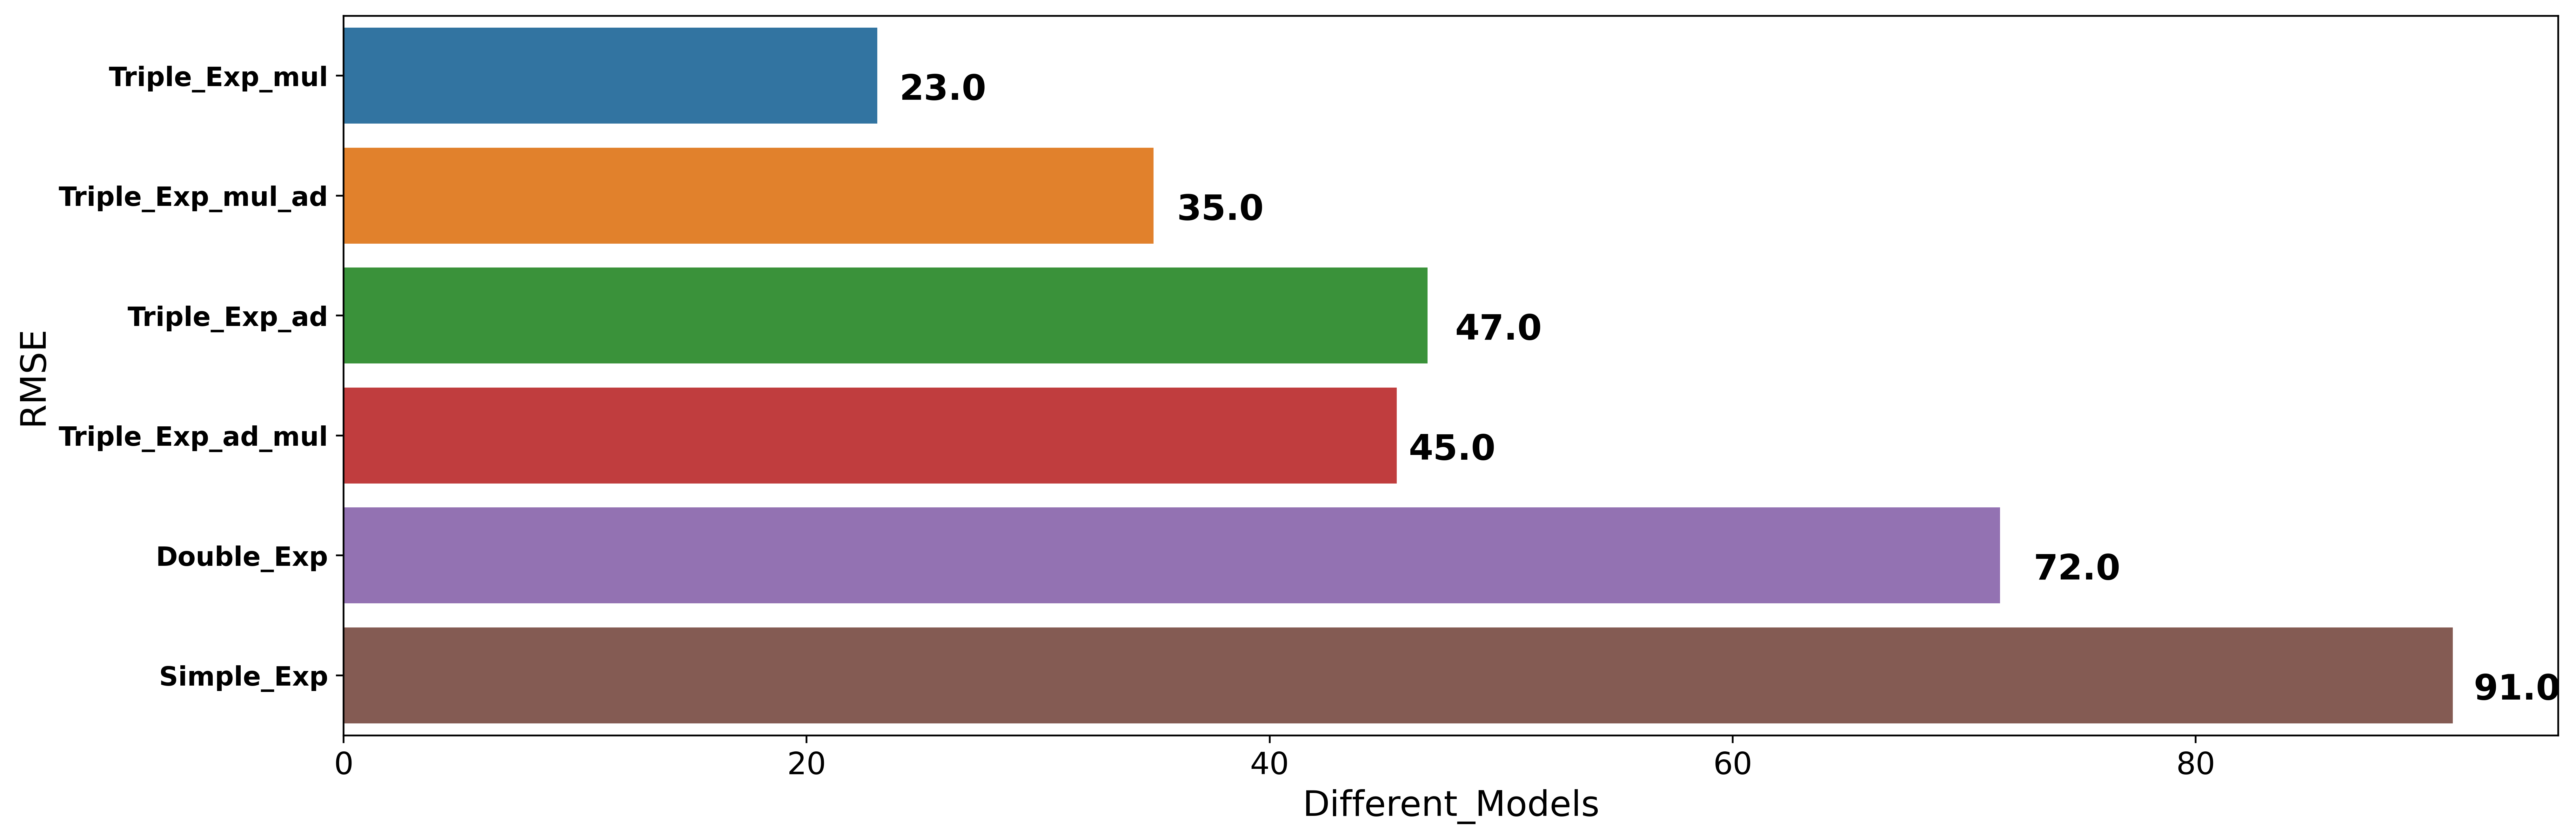

In [94]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=500)
sns.barplot(x='Test_RMSE_Values', y='Models', data=table_evaluation, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(table_evaluation.Test_RMSE_Values.values,0)):
    axe.text(v + 1, i + .20, str(v),
            color = 'black', fontweight = 'bold', fontsize= 16)

plt.show()

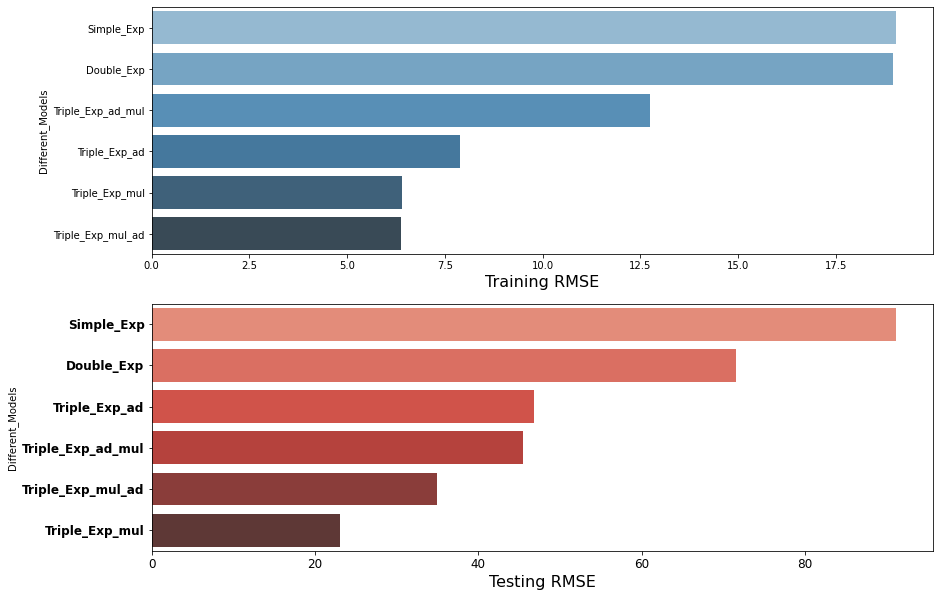

In [96]:
f, axes = plt.subplots(2,1, figsize=(14,10))
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=12)
train_rmse = table_evaluation.sort_values(by=['Train_RMSE'], ascending=False)

sns.barplot(x='Train_RMSE', y='Models', data = train_rmse, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training RMSE', size=16)
axes[0].set_ylabel('Different_Models')

test_rmse = table_evaluation.sort_values(by=['Test_RMSE_Values'], ascending=False)

sns.barplot(x='Test_RMSE_Values', y='Models', data = test_rmse, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('Testing RMSE', size=16)
axes[1].set_ylabel('Different_Models')

plt.show()

#Autoregressive Integrated Moving Averages (ARIMA)

Stationary vs Non-stationary Time Series                                   
Test of Stationarity                                                       
As we have yearly data the window size for moving average is equal to 12

In [99]:
from statsmodels.tsa.stattools import adfuller

In [100]:
def test_stationary(timeseries):
    #determining rolling statistics
    movingAVG=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    #Plotrolling statistics
    original=plt.plot(timeseries,color='Blue',label='Original')
    Mean=plt.plot(movingAVG,color='Red',label='Rolling mean')
    plt.legend(loc='best')
    plt.show()
    
    #Perform dicky-fuller test:
    print('Results of Dicky Fuller Test:')
    dftest=adfuller(timeseries['Passengers'],autolag='AIC')
    dfout=pd.Series(dftest[0:4],index=['Tst_Statisticss','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

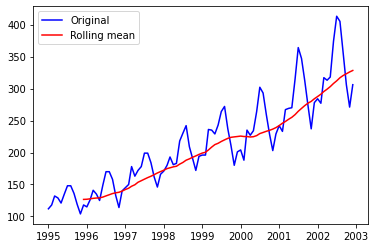

Results of Dicky Fuller Test:
Tst_Statisticss                 1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [101]:
passenger= pd.DataFrame()
passenger['Passengers'] = df1[['Passengers']]
test_stationary(passenger)

In [102]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis/Accept Alternative Hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [103]:
adf_test(passenger)

Fail to reject the null hypothesis
Data is non-stationary


#Feature Scaling (Transformations)

Square Root Transform

<function matplotlib.pyplot.show(*args, **kw)>

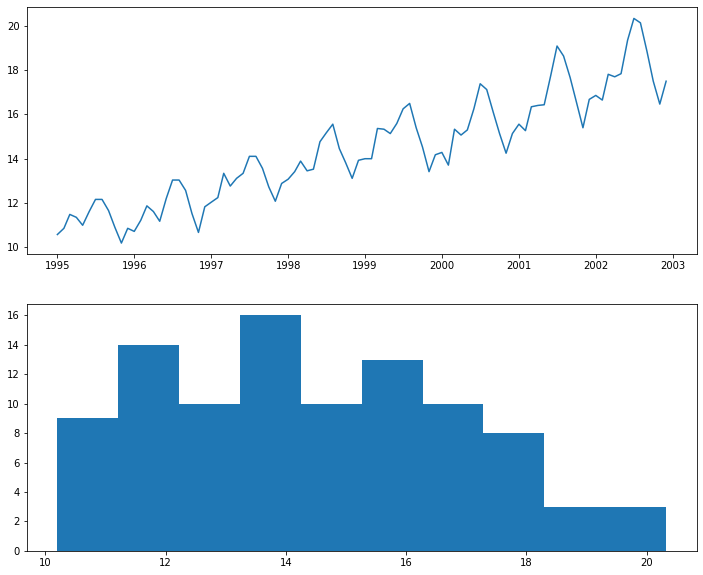

In [105]:
sqrt= pd.DataFrame()
sqrt = df1[['Passengers']]
sqrt['Passengers'] = np.sqrt(sqrt.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(sqrt['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(sqrt['Passengers'])
plt.show

In [106]:
adf_test(sqrt)

Fail to reject the null hypothesis
Data is non-stationary


#Log Transformation

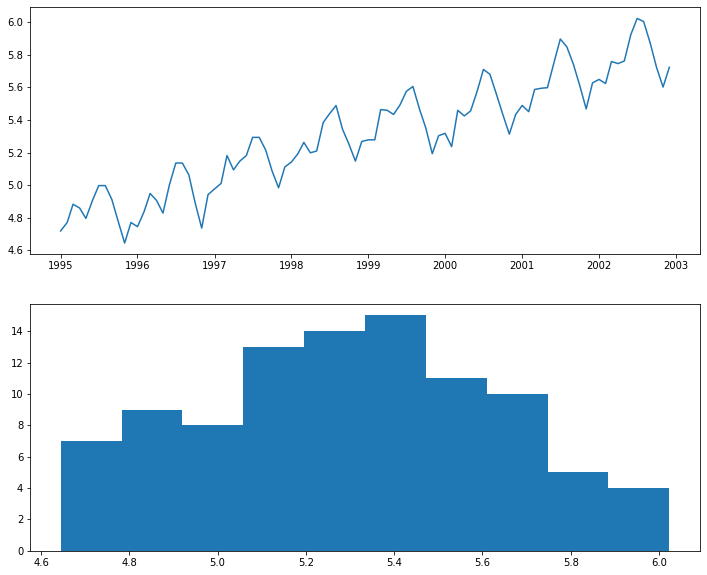

In [107]:
log = pd.DataFrame()
log = df1[['Passengers']]
log['Passengers'] = np.log(log.Passengers)

# line chart
fig=plt.figure(figsize=(12,10))
plt.subplot(211)
plt.plot(log['Passengers'])
#Histogram
plt.subplot(212)
plt.hist(log['Passengers'])
plt.show()

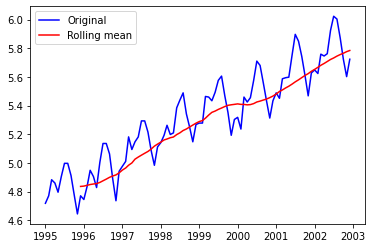

Results of Dicky Fuller Test:
Tst_Statisticss                -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [108]:
test_stationary(log)

In [109]:
adf_test(log)

Fail to reject the null hypothesis
Data is non-stationary


#Converting Non-Stationary Time Series into Stationary

#Differencing

<function matplotlib.pyplot.show(*args, **kw)>

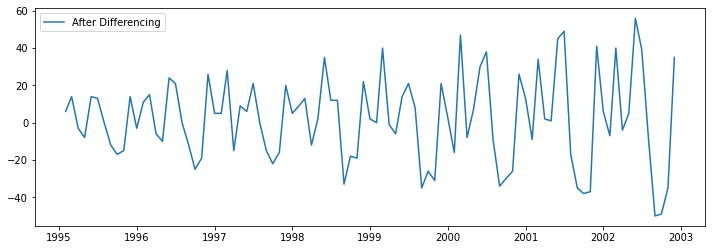

In [111]:
diff = df1['Passengers'] - df1['Passengers'].shift(1)
diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(diff, label='After Differencing')
plt.legend(loc='best')
plt.show

In [112]:
adf_test(diff)

Fail to reject the null hypothesis
Data is non-stationary


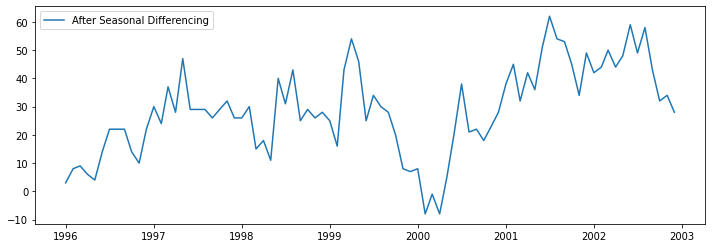

In [113]:
seasonal_differencing = df1['Passengers'] - df1['Passengers'].shift(12)
seasonal_differencing.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(seasonal_differencing, label='After Seasonal Differencing')
plt.legend(loc='best')
plt.show()

In [114]:
adf_test(seasonal_differencing)

Fail to reject the null hypothesis
Data is non-stationary


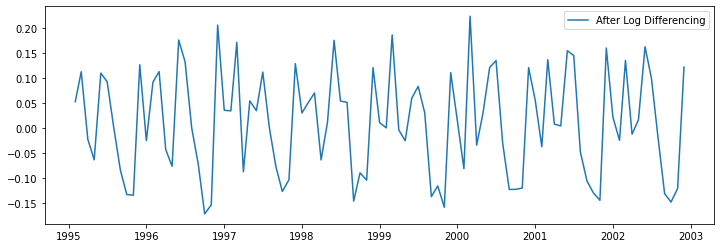

In [115]:
log_diff = log - log.shift(1)
log_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(log_diff, label='After Log Differencing')
plt.legend(loc='best')
plt.show()

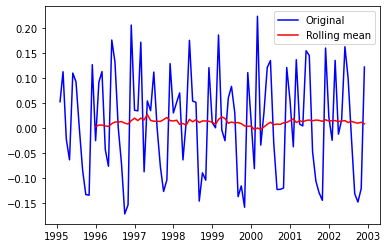

Results of Dicky Fuller Test:
Tst_Statisticss                -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [116]:
test_stationary(log_diff)

In [117]:
adf_test(log_diff)

Fail to reject the null hypothesis
Data is non-stationary


,Passengers
Date,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791


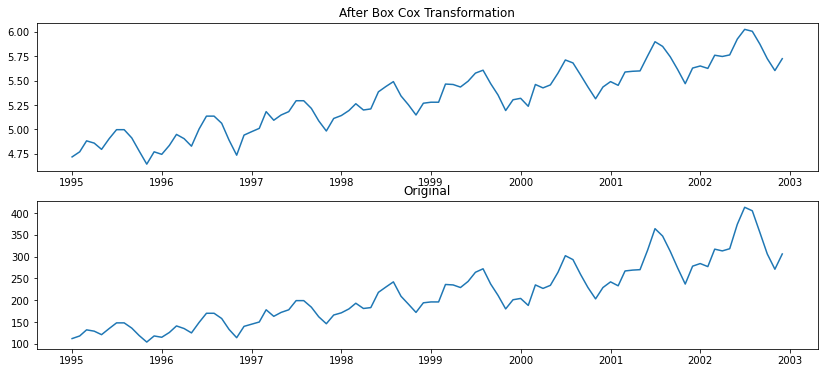

In [119]:
### Box Cox Transformation
from scipy.stats import boxcox
data_boxcox = pd.DataFrame()
data_boxcox['Passengers'] = pd.Series(boxcox(df1['Passengers'], lmbda=0), df1.index)
display(data_boxcox.head())
fig, axis = plt.subplots(2,figsize=(14,6))
axis[0].plot(data_boxcox)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(df1.Passengers, label='original')
axis[1].set_title('Original')
plt.show()

We can see the variance became almost constant after the transformation. Both in the earlier and later years the variance is almost similar.

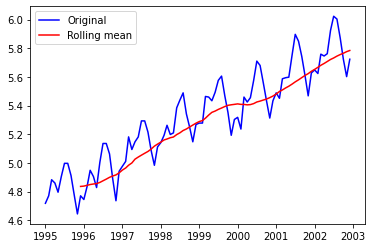

Results of Dicky Fuller Test:
Tst_Statisticss                -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [120]:
test_stationary(data_boxcox)

In [121]:
adf_test(data_boxcox)

Fail to reject the null hypothesis
Data is non-stationary


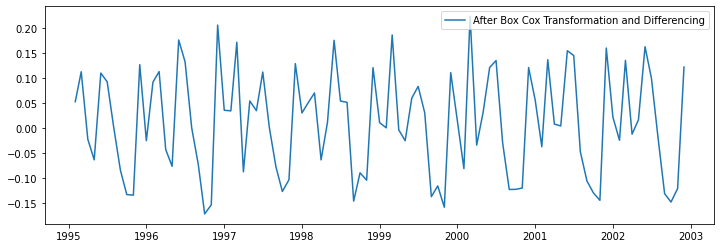

In [122]:
data_boxcox_diff = data_boxcox - data_boxcox.shift()
data_boxcox_diff.dropna(inplace=True)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox Transformation and Differencing')
plt.legend(loc='best')
plt.show()

Now,We can see that there is no trend (upward or downward) after differencing on the Box Cox transformation.
It is a horizontal trend.

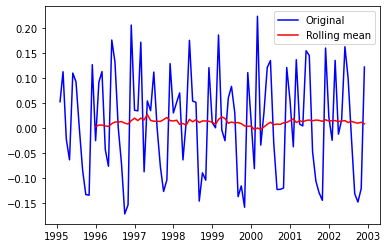

Results of Dicky Fuller Test:
Tst_Statisticss                -2.670823
p-value                         0.079225
#Lags Used                     12.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64


In [124]:
test_stationary(data_boxcox_diff)

In [125]:
adf_test(data_boxcox_diff)

Fail to reject the null hypothesis
Data is non-stationary


In [126]:
data_boxcox_diff

,Passengers
Date,
1995-02-01,0.052186
1995-03-01,0.112117
1995-04-01,-0.022990
1995-05-01,-0.064022
1995-06-01,0.109484
...,...
2002-08-01,-0.019561
2002-09-01,-0.131769
2002-10-01,-0.148533


Finally, Our Series is now stationary for AR Forecasting.